In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

# make plots bigger
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
from STalign import STalign as STa

In [3]:
df1 = pd.read_parquet('cells.parquet')
df2 = pd.read_parquet('cells2.parquet')

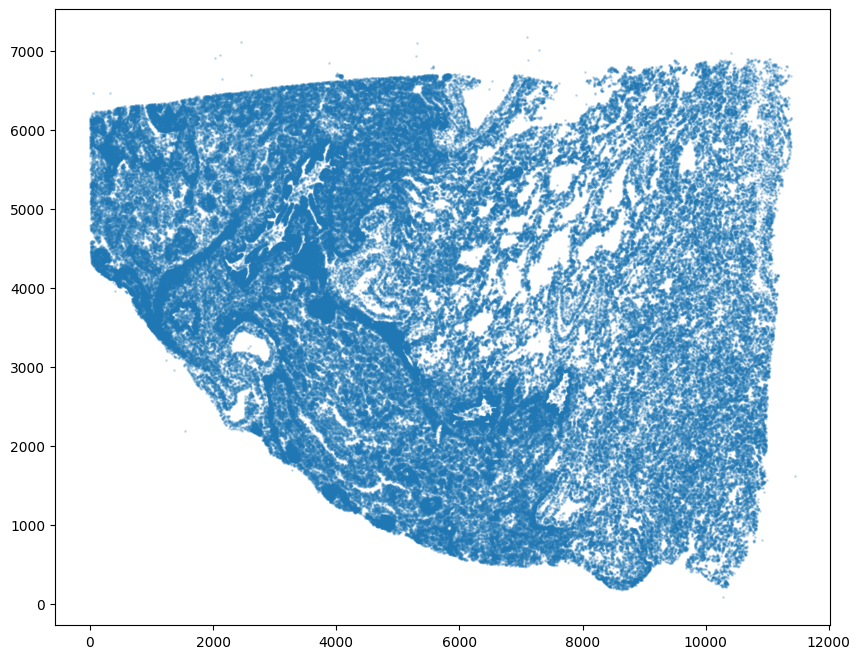

In [4]:
# get cell centroid coordinates
xI = np.array(df1['x_centroid'])
yI = np.array(df1['y_centroid'])

# plot
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=0.2)

0 of 278659
10000 of 278659
20000 of 278659
30000 of 278659
40000 of 278659
50000 of 278659
60000 of 278659
70000 of 278659
80000 of 278659
90000 of 278659
100000 of 278659
110000 of 278659
120000 of 278659
130000 of 278659
140000 of 278659
150000 of 278659
160000 of 278659
170000 of 278659
180000 of 278659
190000 of 278659
200000 of 278659
210000 of 278659
220000 of 278659
230000 of 278659
240000 of 278659
250000 of 278659
260000 of 278659
270000 of 278659
278658 of 278659


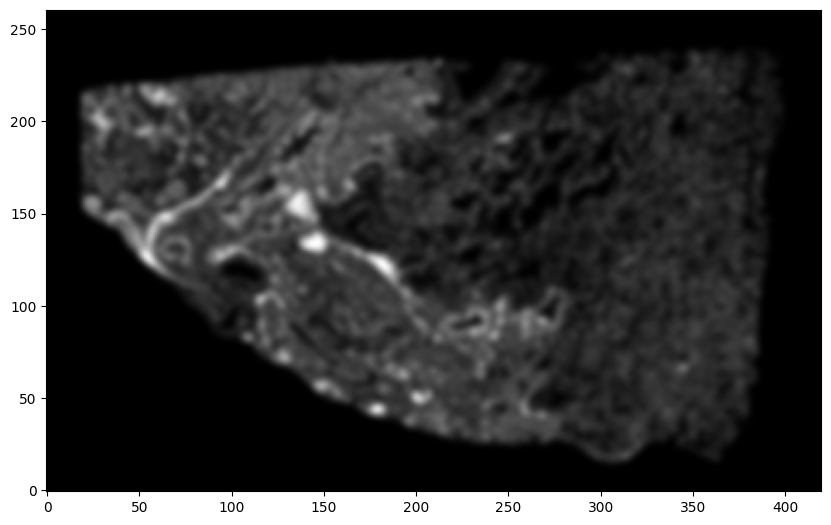

In [ ]:
# rasterize at 30um resolution 
XI,YI,I,fig = STa.rasterize(xI,yI,dx=30)

# plot
ax = fig.axes[0]
ax.invert_yaxis()

0 of 278328


10000 of 278328
20000 of 278328
30000 of 278328
40000 of 278328
50000 of 278328
60000 of 278328
70000 of 278328
80000 of 278328
90000 of 278328
100000 of 278328
110000 of 278328
120000 of 278328
130000 of 278328
140000 of 278328
150000 of 278328
160000 of 278328
170000 of 278328
180000 of 278328
190000 of 278328
200000 of 278328
210000 of 278328
220000 of 278328
230000 of 278328
240000 of 278328
250000 of 278328
260000 of 278328
270000 of 278328
278327 of 278328


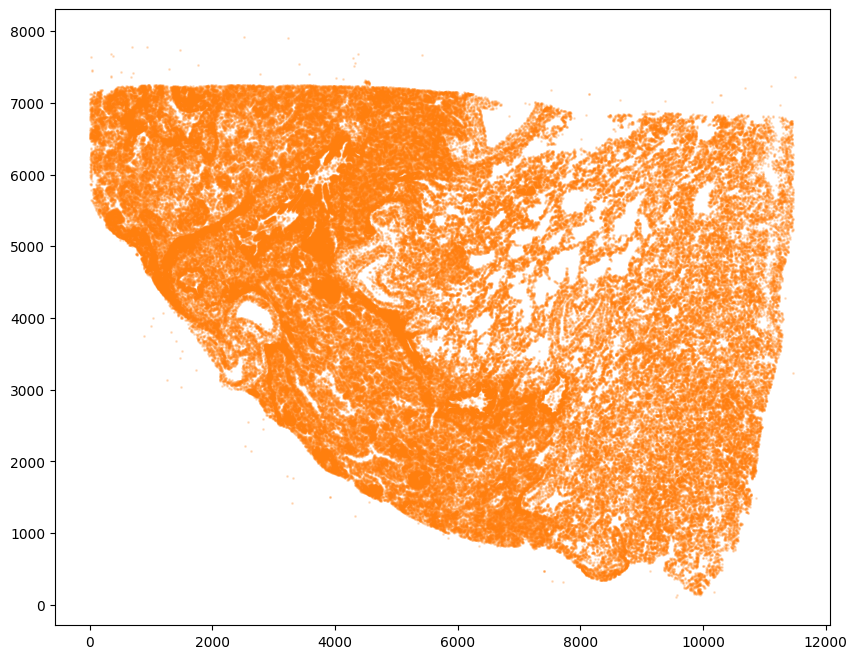

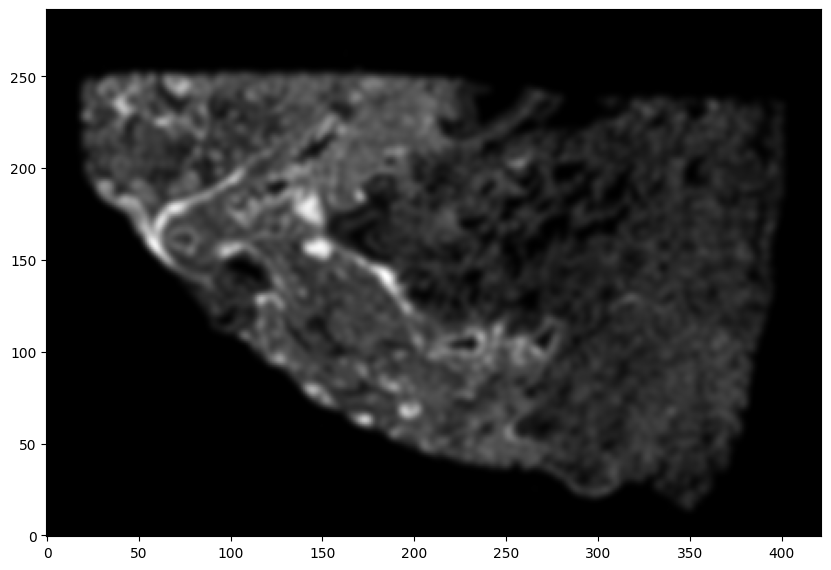

In [8]:
# get cell centroids
xJ = np.array(df2['x_centroid'])
yJ = np.array(df2['y_centroid'])

# plot
fig,ax = plt.subplots()
ax.scatter(xJ,yJ,s=1,alpha=0.2,c='#ff7f0e')

# rasterize and plot
XJ,YJ,J,fig = STa.rasterize(xJ,yJ,dx=30)
ax = fig.axes[0]
ax.invert_yaxis()

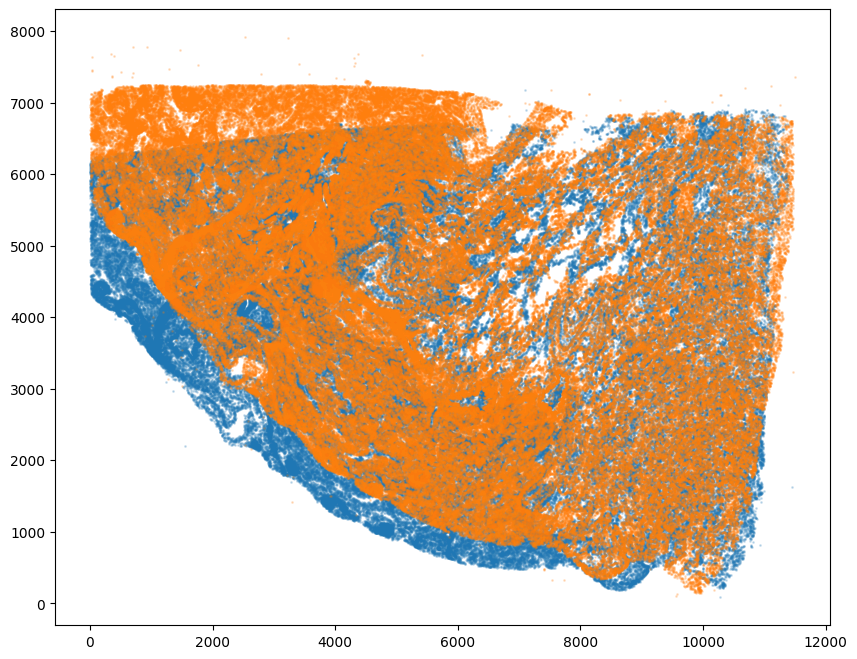

In [9]:
# plot
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=0.2)
ax.scatter(xJ,yJ,s=1,alpha=0.2)

In [ ]:
# write out npz files for landmark point picker
# np.savez('Rep1', x=XI,y=YI,I=I)
# np.savez('Rep2', x=XJ,y=YJ,I=J)

In [11]:
# Run in terminal
# python point_annotator.py Rep1.npz Rep2.npz

In [12]:
# pointsI = [[3748.85025485, 3797.96118125],
#        [1096.0760613 , 4856.0902135 ],
#        [3540.20509356, 1055.76763286],
#        [2556.59219033, 6823.31601996],
#        [6192.9792871 , 1234.60634254],
#        [4777.17283549, 4364.28376189]]

# pointsJ = [[4396.186065033944, 3919.2816187520184],
#  [1670.8828392274936, 4682.9654897197615],
#  [4471.05703277588, 1193.9783929455698],
#  [2853.8441295500743, 6794.326780042342],
#  [7061.592516646848, 1673.152586493954],
#  [2288.3341258141318, 5809.896665116664]]

In [13]:
# read from file
pointsIlist = np.load('Rep1_points.npy', allow_pickle=True).tolist()
print(pointsIlist)
pointsJlist = np.load('Rep2_points.npy', allow_pickle=True).tolist()
print(pointsJlist)

{'0': [(7214.61386941774, 1098.0868139861723)], '1': [(5546.777310277955, 1306.5663838786459)], '2': [(1034.6837618908576, 3570.058856996926)], '3': [(2896.1084930736533, 2870.163158072195)], '4': [(975.1181704930077, 5625.071760222734)], '5': [(3596.004191998384, 3808.3212225883235)], '6': [(9805.717095224194, 1812.873910760367)], '7': [(7661.355804901611, 3063.751330115205)], '8': [(4415.031073718815, 4776.262082803378)], '9': [(2717.4117188801056, 2244.724448394776)], '10': [(7035.917095224192, 5595.288964523808)], '11': [(6807.627855311159, 3169.6269252489983)]}
{'0': [(6942.1826940208375, 1420.414022023193)], '1': [(5372.376242407936, 1794.1774628834082)], '2': [(1186.2257047735256, 4485.274237076956)], '3': [(2935.4386079993346, 3618.1430542812577)], '4': [(1305.8300058487948, 6548.448430625342)], '5': [(3697.916027354171, 4440.422624173731)], '6': [(9663.180543483202, 1824.0785381522255)], '7': [(7689.709575741268, 3274.2806886898597)], '8': [(4594.948285418686, 5277.65273170061

In [ ]:
# convert to array
pointsI = []
pointsJ = []

for i in pointsIlist.keys():
    pointsI.append([pointsIlist[i][0][1], pointsIlist[i][0][0]])
for i in pointsJlist.keys():
    pointsJ.append([pointsJlist[i][0][1], pointsJlist[i][0][0]])



In [ ]:
# marked the last landmark point wrong so removing it, you dont have to do this necessarily
pointsI.pop()
pointsJ.pop()

[2795.706168824883, 6782.763331783332]

In [16]:
pointsI = np.array(pointsI)
pointsJ = np.array(pointsJ)

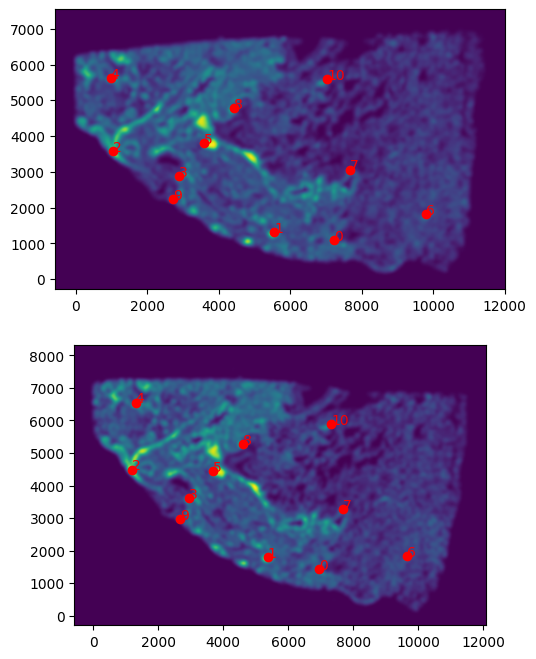

In [17]:
# get extent of images
extentI = STa.extent_from_x((YI,XI))
extentJ = STa.extent_from_x((YJ,XJ))

# plot rasterized images
fig,ax = plt.subplots(2,1)
ax[0].imshow((I.transpose(1,2,0).squeeze()), extent=extentI) # just want 201x276 matrix
ax[1].imshow((J.transpose(1,2,0).squeeze()), extent=extentJ) # just want 201x276 matrix
# with points
ax[0].scatter(pointsI[:,1], pointsI[:,0], c='red')
ax[1].scatter(pointsJ[:,1], pointsJ[:,0], c='red')
for i in range(pointsI.shape[0]):
    ax[0].text(pointsI[i,1],pointsI[i,0],f'{i}', c='red')
    ax[1].text(pointsJ[i,1],pointsJ[i,0],f'{i}', c='red')
ax[0].invert_yaxis()
ax[1].invert_yaxis()

In [18]:
if torch.cuda.is_available():
    torch.set_default_device('cuda:0')
else:
    torch.set_default_device('cpu')
# print(device)

In [19]:
L,T = STa.L_T_from_points(pointsI, pointsJ)
A = STa.to_A(torch.tensor(L),torch.tensor(T))

/scratch/work/sagara22/spacel/.spacelenv/lib/python3.11/site-packages/torch/utils/_device.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


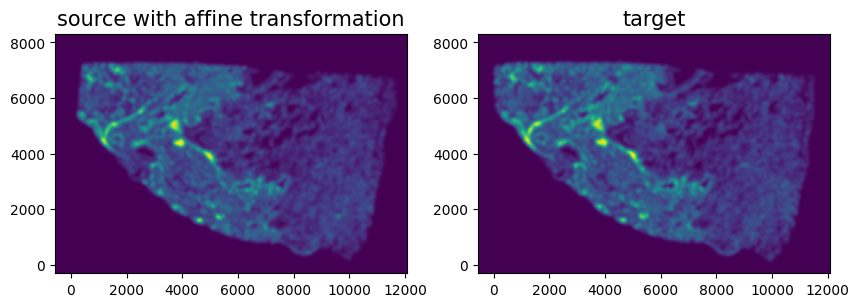

In [20]:
# compute initial affine transformation from points
AI = STa.transform_image_source_with_A(A, [YI,XI], I, [YJ,XJ])

#switch tensor from cuda to cpu for plotting with numpy
if AI.is_cuda:
    AI = AI.cpu()

fig,ax = plt.subplots(1,2)
ax[0].imshow((AI.permute(1,2,0).squeeze()), extent=extentJ)
ax[1].imshow((J.transpose(1,2,0).squeeze()), extent=extentJ)

ax[0].set_title('source with affine transformation', fontsize=15)
ax[1].set_title('target', fontsize=15)

ax[0].invert_yaxis()
ax[1].invert_yaxis()

/scratch/work/sagara22/spacel/.spacelenv/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/scratch/work/sagara22/spacel/.spacelenv/lib/python3.11/site-packages/STalign/STalign.py:1301: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axE[2].set_yscale('log')


CPU times: user 15min 8s, sys: 8.33 s, total: 15min 16s
Wall time: 8min 56s


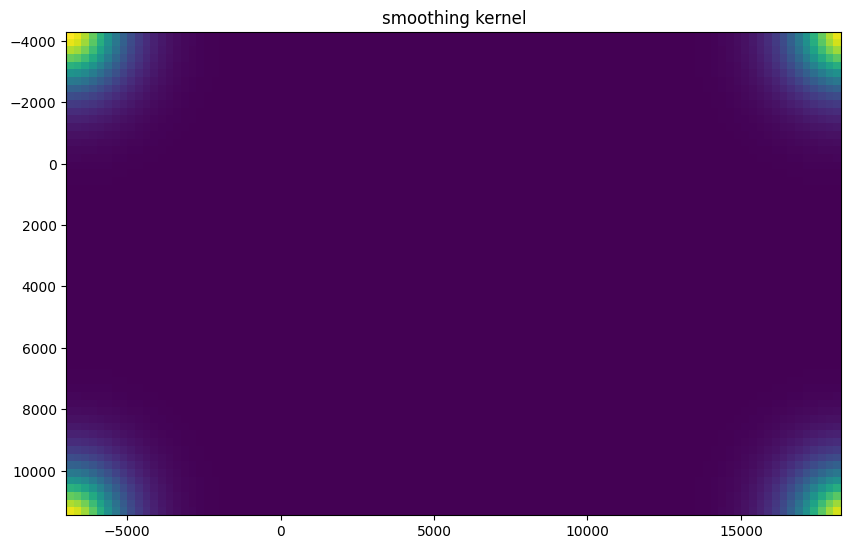

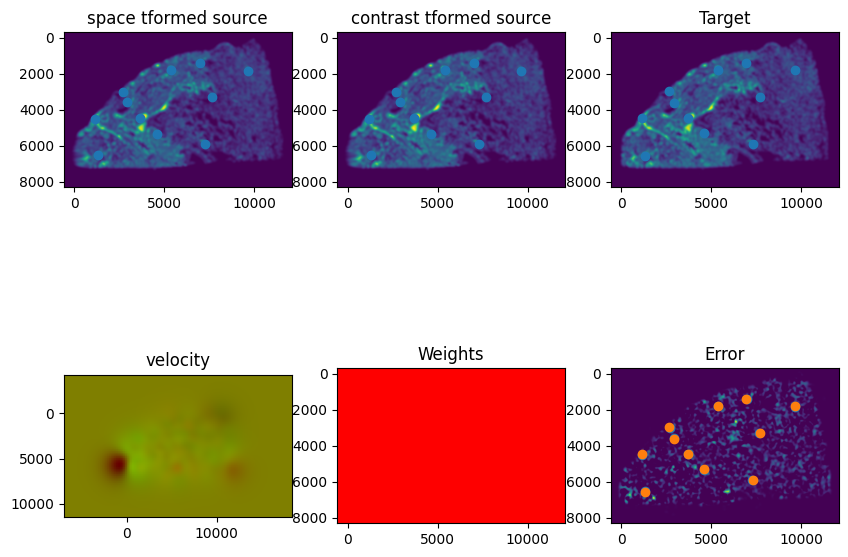

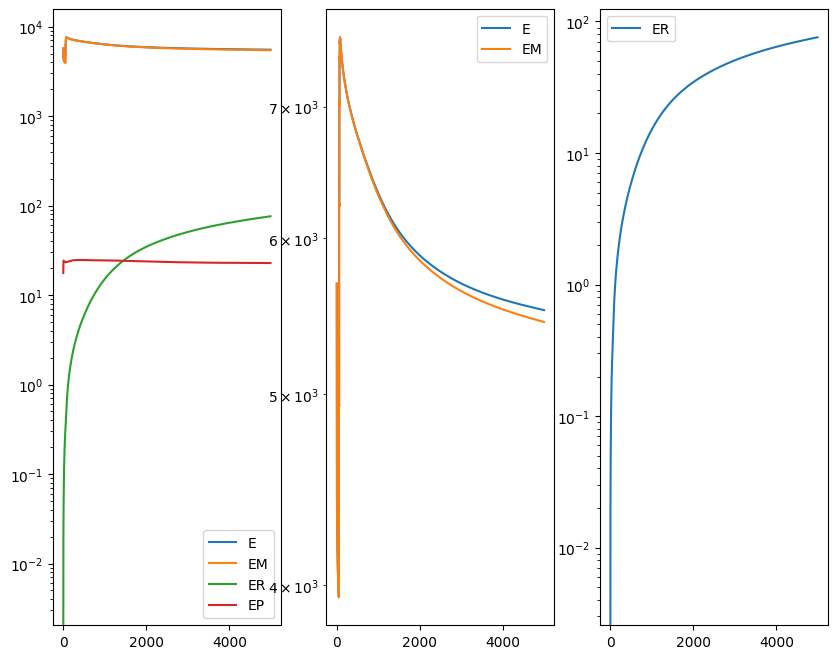

In [21]:
%%time

# run LDDMM
# specify device (default device for STalign.LDDMM is cpu)
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

# keep all other parameters default
params = {'L':L,'T':T,
          'niter':5000,
          'pointsI':pointsI,
          'pointsJ':pointsJ,
          'device':device,
          'sigmaM':1.5,
          'sigmaB':1.0,
          'sigmaA':1.1,
          'epV': 100
          }

out = STa.LDDMM([YI,XI],I,[YJ,XJ],J,**params)

In [22]:
# get necessary output variables
A = out['A']
v = out['v']
xv = out['xv']

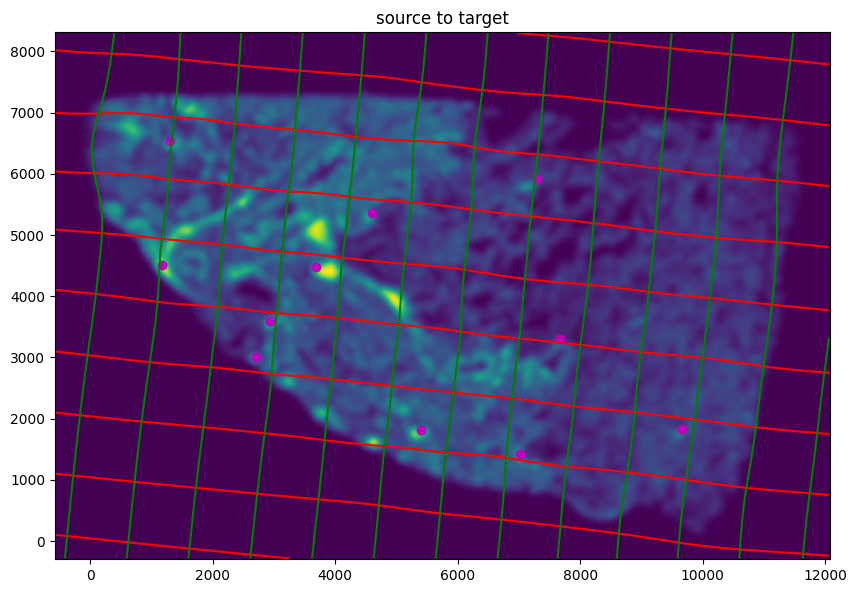

In [23]:
# apply transform
phii = STa.build_transform(xv,v,A,XJ=[YJ,XJ],direction='b')
phiI = STa.transform_image_source_to_target(xv,v,A,[YI,XI],I,[YJ,XJ])
phipointsI = STa.transform_points_source_to_target(xv,v,A,pointsI)

#switch tensor from cuda to cpu for plotting with numpy
if phii.is_cuda:
    phii = phii.cpu()
if phiI.is_cuda:
    phiI = phiI.cpu()
if phipointsI.is_cuda:
    phipointsI = phipointsI.cpu()

# plot with grids
fig,ax = plt.subplots()
levels = np.arange(-100000,100000,1000)
ax.contour(XJ,YJ,phii[...,0],colors='r',linestyles='-',levels=levels)
ax.contour(XJ,YJ,phii[...,1],colors='g',linestyles='-',levels=levels)
ax.set_aspect('equal')
ax.set_title('source to target')
ax.imshow(phiI.permute(1,2,0)/torch.max(phiI),extent=extentJ)
ax.scatter(phipointsI[:,1].detach(),phipointsI[:,0].detach(),c="m")
ax.invert_yaxis()

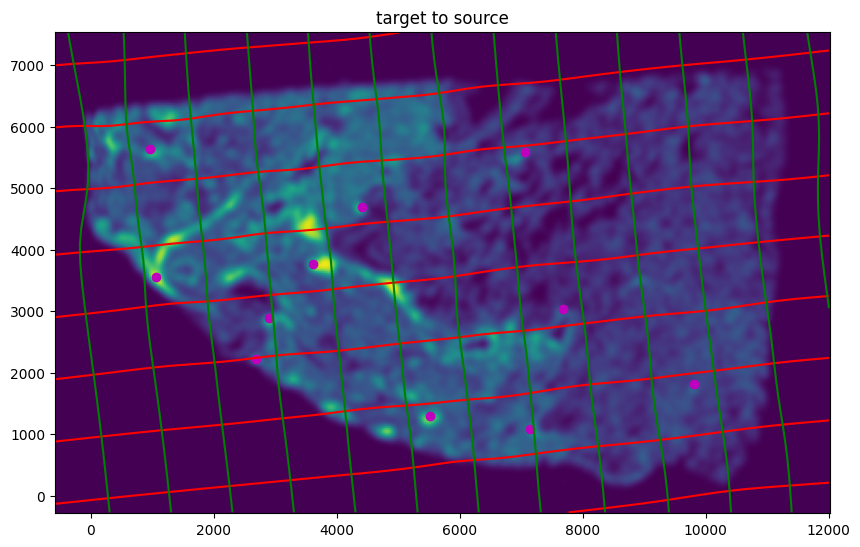

In [24]:
# transform is invertible
phi = STa.build_transform(xv,v,A,XJ=[YI,XI],direction='f')
phiiJ = STa.transform_image_target_to_source(xv,v,A,[YJ,XJ],J,[YI,XI])
phiipointsJ = STa.transform_points_target_to_source(xv,v,A,pointsJ)

#switch tensor from cuda to cpu for plotting with numpy
if phi.is_cuda:
    phi = phi.cpu()
if phiiJ.is_cuda:
    phiiJ = phiiJ.cpu()
if phiipointsJ.is_cuda:
    phiipointsJ = phiipointsJ.cpu()

# plot with grids
fig,ax = plt.subplots()
levels = np.arange(-100000,100000,1000)
ax.contour(XI,YI,phi[...,0],colors='r',linestyles='-',levels=levels)
ax.contour(XI,YI,phi[...,1],colors='g',linestyles='-',levels=levels)
ax.set_aspect('equal')
ax.set_title('target to source')
ax.imshow(phiiJ.permute(1,2,0)/torch.max(phiiJ),extent=extentI)
ax.scatter(phiipointsJ[:,1].detach(),phiipointsJ[:,0].detach(),c="m")
ax.invert_yaxis()

In [25]:
# apply transform to original points of target to source
tpointsJ = STa.transform_points_target_to_source(xv,v,A, np.stack([yJ, xJ], 1))

#switch tensor from cuda to cpu for plotting with numpy
if tpointsJ.is_cuda:
    tpointsJ = tpointsJ.cpu()

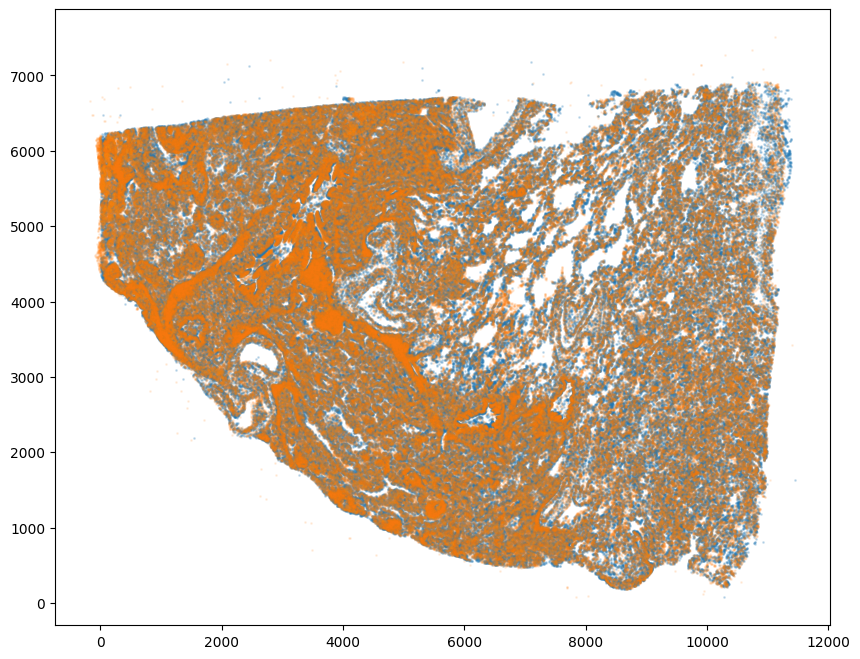

In [ ]:
# plot results
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=0.2)
ax.scatter(tpointsJ[:,1],tpointsJ[:,0],s=1,alpha=0.1)

In [ ]:
def plot_zoomed_point_transformation(xI, yI, tpointsJ, x_min=None, x_max=None, y_min=None, y_max=None):
    """
    Plot a zoomed-in version of point transformation 
    
    Parameters:
    - xI, yI: Original source point coordinates
    - tpointsJ: Transformed target point coordinates
    - x_min, x_max, y_min, y_max: Optional limits for zoomed region
    """
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Scatter plot of original points with more saturated blue
    ax.scatter(xI, yI, s=2, alpha=0.4, color='royalblue', label='Original Points', edgecolors='none')
    
    # Scatter plot of transformed points with more saturated red
    ax.scatter(tpointsJ[:,1], tpointsJ[:,0], s=2, alpha=0.4, color='crimson', label='Transformed Points', edgecolors='none')
    
    # Set title and labels
    ax.set_title('Zoomed Point Transformation Visualization', fontsize=14, fontweight='bold')
    ax.set_xlabel('X Coordinate', fontsize=12)
    ax.set_ylabel('Y Coordinate', fontsize=12)
    
    # Add legend
    ax.legend(fontsize=10)
    
    if x_min is not None and x_max is not None:
        ax.set_xlim(x_min, x_max)
    
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # Automatically determine zoom limits if not provided
    if x_min is None or x_max is None or y_min is None or y_max is None:
        # Combine both original and transformed points for auto-zooming
        all_points = np.concatenate([
            np.column_stack([xI, yI]),
            tpointsJ[:, [1, 0]]  # Swap back to x, y order
        ])
        
        # If any limits are not provided, use data-driven limits
        x_min = all_points[:, 0].min() if x_min is None else x_min
        x_max = all_points[:, 0].max() if x_max is None else x_max
        y_min = all_points[:, 1].min() if y_min is None else y_min
        y_max = all_points[:, 1].max() if y_max is None else y_max
        
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.5, color='gray')
    
    # Tight layout to prevent cutting off labels
    plt.tight_layout()
    
    return fig, ax



/tmp/ipykernel_1034967/3910977382.py:58: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/scratch/work/sagara22/spacel/.spacelenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


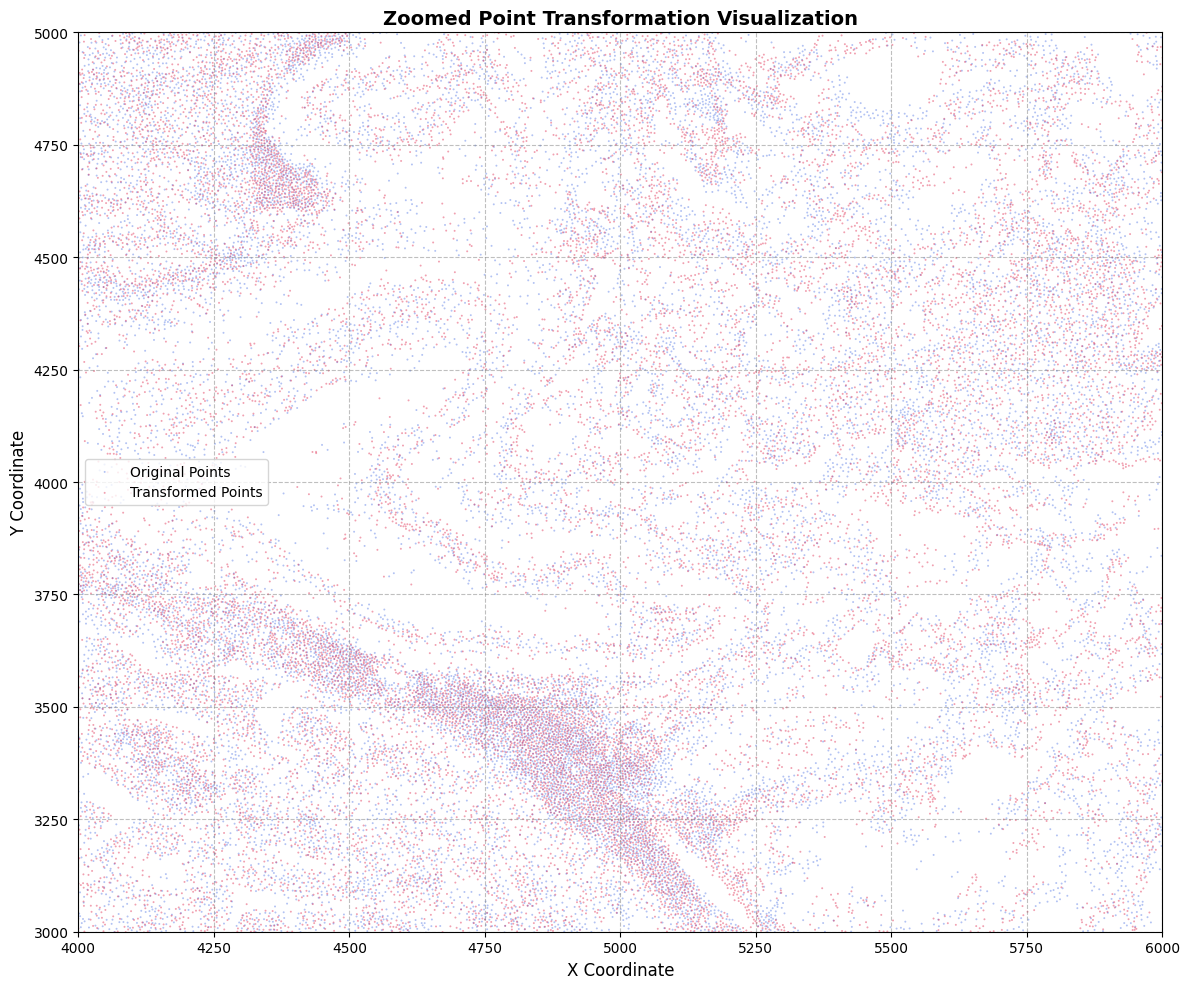

In [ ]:
plot_zoomed_point_transformation(xI, yI, tpointsJ, x_min=4000, x_max=6000, y_min=3000, y_max=5000)
plt.show()

In [29]:
results = np.hstack((df2, tpointsJ.numpy()))

In [ ]:
from scipy.spatial import KDTree

def align_and_merge_datasets(df1, df2, pointsI, pointsJ, xv, v, A, threshold=100):
    """
    Align and merge two spatial transcriptomics datasets using Greedy Nearest Neighbor
    
    Parameters:
    -----------
    df1 : pandas.DataFrame
        First dataset (source)
    df2 : pandas.DataFrame
        Second dataset (target)
    xv : torch.Tensor
        Deformation vector field
    v : torch.Tensor
        Velocity field
    A : torch.Tensor
        Affine transformation matrix
    threshold : float
        Maximum allowed distance for matching
    
    Returns:
    --------
    pandas.DataFrame
        Merged dataset with transformed coordinates
    """
    # Transform points from target dataset to source dataset
    tpointsJ = STa.transform_points_target_to_source(xv, v, A,
                                                     np.stack([df2['y_centroid'].values,
                                                               df2['x_centroid'].values], 1))
    
    # Move tensor back to CPU for numpy conversion
    if tpointsJ.is_cuda:
        tpointsJ = tpointsJ.cpu()
    
    # Create a new dataframe with transformed coordinates
    df2_transformed = df2.copy()
    df2_transformed['transformed_x_centroid'] = tpointsJ.numpy()[:, 1]
    df2_transformed['transformed_y_centroid'] = tpointsJ.numpy()[:, 0]
    
    # Prepare coordinates
    source_coords = df1[['x_centroid', 'y_centroid']].values
    target_coords = df2_transformed[['transformed_x_centroid', 'transformed_y_centroid']].values
    
    # Greedy Nearest Neighbor Matching
    def greedy_nearest_neighbor(source_points, target_points, threshold):
        """
        Greedy nearest-neighbor matching with a distance threshold.
        Ensures no duplicate assignments.
        
        Parameters:
        -----------
        source_points : np.array
            Source points of shape (N, 2)
        target_points : np.array
            Target points of shape (M, 2)
        threshold : float
            Maximum allowed distance for assignment
        
        Returns:
        --------
        matches : List of (source_idx, target_idx) pairs
        """
        tree = KDTree(target_points)
        matches = []
        assigned_targets = set()
        
        for i, src in enumerate(source_points):
            # Query nearest point
            dist, idx = tree.query(src)
            
            # Check distance and uniqueness
            if dist < threshold and idx not in assigned_targets:
                matches.append((i, idx))
                assigned_targets.add(idx)
        
        return matches
    
    # Perform greedy matching
    matches = greedy_nearest_neighbor(source_coords, target_coords, threshold)
    
    # Create matched dataset
    matched_source = df1.iloc[[m[0] for m in matches]].reset_index(drop=True)
    matched_target = df2_transformed.iloc[[m[1] for m in matches]].reset_index(drop=True)
    
    # Combine datasets
    merged_df = pd.concat([
        matched_source.add_suffix('_source'),
        matched_target.add_suffix('_target')
    ], axis=1)
    
    return merged_df


In [ ]:

def visualize_matching(df1, df2_transformed, matches):
    """
    Visualize the spatial matching between datasets
    
    Parameters:
    -----------
    df1 : pandas.DataFrame
        Source dataset
    df2_transformed : pandas.DataFrame
        Transformed target dataset
    matches : list
        List of matched indices
    """
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 6))
    
    # Plot source dataset
    plt.scatter(df1['x_centroid'], df1['y_centroid'], 
                c='blue', label='Source Dataset', alpha=0.5)
    
    # Plot transformed target dataset
    plt.scatter(df2_transformed['transformed_x_centroid'], 
                df2_transformed['transformed_y_centroid'], 
                c='red', label='Transformed Target Dataset', alpha=0.5)
    
    # Draw lines between matched points
    source_coords = df1[['x_centroid', 'y_centroid']].values
    target_coords = df2_transformed[['transformed_x_centroid', 'transformed_y_centroid']].values
    
    for src_idx, tgt_idx in matches:
        src = source_coords[src_idx]
        tgt = target_coords[tgt_idx]
        plt.plot([src[0], tgt[0]], [src[1], tgt[1]], 
                 color='green', alpha=0.2, linestyle='--')
    
    plt.title('Greedy Nearest Neighbor Matching')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [57]:
merged_results = align_and_merge_datasets(df1, df2, pointsI, pointsJ, xv, v, A)
# visualize_matching(df1, merged_results, matches)

/tmp/ipykernel_1034967/1119662489.py:105: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/scratch/work/sagara22/spacel/.spacelenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


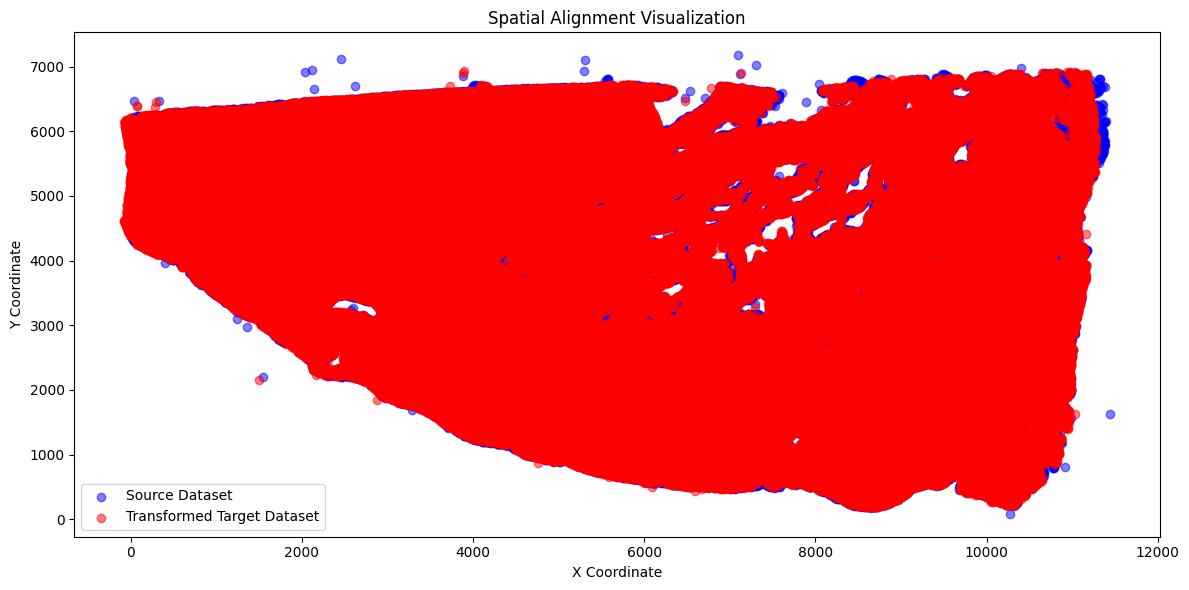

In [51]:
merged_results = align_and_merge_datasets(df1, df2, pointsI, pointsJ, xv, v, A)
visualize_matching(df1, merged_results)

In [58]:
merged_results.head(10)

cell_id_source  x_centroid_source  y_centroid_source   
0     aaaadcac-1         315.479584        4135.815918  \
1     aaaaieak-1         317.920197        4126.272461   
2     aaaanbhm-1         318.433136        4109.978027   
3     aaaankfe-1         335.111847        4116.146484   
4     aaaankfi-1         341.734100        4125.354980   
5     aaaaoeaa-1         341.413544        4112.580566   
6     aaabnbbd-1         322.775299        4131.812500   
7     aaacicpc-1         328.581512        4116.104980   
8     aaackknk-1         330.412628        4125.833984   
9     aaacpgdb-1         397.331848        4122.966797   

   transcript_counts_source  control_probe_counts_source   
0                        35                            0  \
1                        61                            0   
2                       292                            0   
3                       303                            1   
4                        32                            0   
5                       457                            0   
6                        22                            0   
7                       334                            0   
8                       101                            0   
9                       111                            0   

   genomic_control_counts_source  control_codeword_counts_source   
0                              0                               0  \
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
5                              0                               0   
6                              0                               0   
7                              0                               0   
8                              0                               0   
9                              0                               0   

   unassigned_codeword_counts_source  deprecated_codeword_counts_source   
0                                  0                                  0  \
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   
5                                  0                                  0   
6                                  0                                  0   
7                                  0                                  0   
8                                  0                                  0   
9                                  0                                  0   

   total_counts_source  ...  control_codeword_counts_target   
0                   35  ...                               0  \
1                   61  ...                               0   
2                  292  ...                               0   
3                  304  ...                               0   
4                   32  ...                               0   
5                  457  ...                               0   
6                   22  ...                               0   
7                  334  ...                               0   
8                  101  ...                               0   
9                  111  ...                               0   

   unassigned_codeword_counts_target  deprecated_codeword_counts_target   
0                                  0                                  2  \
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                      

In [54]:
len(merged_results['common_cell_id'].unique())/len(merged_results['common_cell_id'])

0.6242992266337004

In [ ]:
merged_results = align_and_merge_datasets(df1, df2, pointsI, pointsJ, xv, v, A)
merged_results.to_parquet('merged_aligned_cells.parquet')

In [34]:
dfNew = pd.read_parquet('merged_aligned_cells.parquet')